## ***K-means Kumeleme Algoritmasi Performans Olcumu***

## Q1
- İki küme k-ortalama çözümünün siluet katsayısını elde edin. Siluet katsayısının, küme sayısının üç olduğu yukarıdakilerden büyük olacağını göreceksiniz. Iris veri setinin üç farklı kümeden oluştuğunu biliyoruz. Kümelerin sayısının doğru sınıf sayısına eşit olmasıyla çözümün siluet puanının, küme sayısının doğru sınıf sayısından farklı olduğu seviyeden daha düşük olduğunu nasıl açıklarsınız?

In [33]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import datasets, metrics

In [34]:
# Loading the data from Sklearn's datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Standarizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

---
#### ***Siluet Katsayilari***

In [35]:
print('Silhouette Scores for:') 
for n in range(2,4):
    etiketler = KMeans(n_clusters=n, random_state=123).fit_predict(X_std)
    print('\t{} clusters :{:.6f}'.format(n, metrics.silhouette_score(X_std, etiketler,
                                                                     metric='euclidean')))

Silhouette Scores for:
	2 clusters :0.581750
	3 clusters :0.459948


- Ver hakkinda bilgi sahibi olmadigimizda sanki iki kume varmis gibi gozukuyordu. Bu aslinda verinin karmasikligindan kaynaklaniyordu. Bir kume digerlerinden lineer olarak ayriliyor ancak diger ikisi ayrilamiyordu. Bu nedenle siluet skorunda 2 kumeli cozumun daha iyi olmasi dogaldir.

---
## Q2

Bu ödevde, UC Irvine Machine Learning Repository'de bulunan [kalp hastalığı veri seti](http://archive.ics.uci.edu/ml/datasets/Heart+Disease)yle çalışacaksınız.

Veri setine K-ortalama farkli k degerleri icin uygulanacak :

- Tutarlilik
- ARI puani
- Siluet puanlari incelenecektir.

#### Preprocessing

In [36]:
# birden fazla dosyayi okuma
import glob

path = r'./data' # use your path
all_files = glob.glob(path + "/processed*.data")

li = []

for filename in all_files:
    df = pd.read_csv(filename,header=0)
    # sutun isimlerini ayni yapiyoruz ki concat etmede sutun sayimiz artmasin
    # farkli isimdeki sutunlar olusmasin
    df.columns = [x for x in range(14)]
    li.append(df)

heart = pd.concat(li, axis=0, ignore_index=True)

In [37]:
heart

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,34.0,1.0,4.0,115,0,?,?,154,0,.2,1,?,?,1
1,35.0,1.0,4.0,?,0,?,0,130,1,?,?,?,7,3
2,36.0,1.0,4.0,110,0,?,0,125,1,1,2,?,6,1
3,38.0,0.0,4.0,105,0,?,0,166,0,2.8,1,?,?,2
4,38.0,0.0,4.0,110,0,0,0,156,0,0,2,?,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,45.0,1.0,1.0,110,264,0,0,132,0,1.2,2,0.0,7.0,1
912,68.0,1.0,4.0,144,193,1,0,141,0,3.4,2,2.0,7.0,2
913,57.0,1.0,4.0,130,131,0,0,115,1,1.2,2,1.0,7.0,3
914,57.0,0.0,2.0,130,236,0,2,174,0,0,2,1.0,3.0,1


- Burada, X sizin özellikleriniz olacak ve y içinde etiketleri tutuyoruz. Y, 1'e eşitse, o zaman buna karşılık gelen hastanın kalp hastalığı olduğunu ve y'nin 0'a eşit olması durumunda, hastanın kalp hastalığı olmadığı anlaşılacaktır.

In [38]:
# Veri setini kullanmadan önce bazı ön işlemler yapmanız gerekiyor:

# Define the features and the outcome
X = heart.iloc[:, :13]
y = heart.iloc[:, 13]

# Replace missing values (marked by ?) with a 0
X = X.replace(to_replace='?', value=0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis
y = np.where(y > 0, 0, 1)

---
#### ***Tutarlilik***
- Verileri rastgele ikiye bölün ve bu bölümdeki tutarlılık tartışmamızda yaptığımız gibi, küme sayısı olarak iki, üç ve dört kullanarak k-ortalama uygulayın. Görselleştirmeyi kullanarak çözümlerin tutarlılığını değerlendirin. Hangisi en iyisi gibi görünüyor?

- Alt örneklemler arasında tutarlılığı gözlemlemek için, veri kümesi iki rastgele parçaya bölünur, küme sayısı olarak iki, üç ve dört kullanarak k-ortalama uyguladiktan sonra görselleştirme kullanarak tutarlılık değerlendirilir.

In [39]:
# kümeleme algoritmalalarının çoğu değişkenlerin ölçeklerine duyarlı olduklarından 
# değişkenleri standartlaştırıyoruz
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# görselleştirme amacıyla sadece ilk iki ana bileşeni kullanabiliriz
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

# Alt örneklemler arasında tutarlılığı gözlemlemek için,
# veri kümesini iki rastgele parçaya böldük
# verileri ikiye böldüğümüzde, temel bileşenleri de buna göre böleriz.
X_yarı1, X_yarı2, X_pcayarı1, X_pcayarı2 = train_test_split(
    X_std,
    X_pca,
    test_size=0.5,
    random_state=222)

In [41]:
# Data frame to store features and predicted cluster memberships.
ytahmin = pd.DataFrame()

# Pass a list of tuples and a counter that increments each time we go
# through the loop. The tuples are the data to be used by k-means,
# and the PCA-derived features for graphing. We use k-means to fit a
# model to the data, then store the predicted values and the two-feature
# PCA solution in the data frame.
for counter, data in enumerate([
    (X_yarı1, X_pcayarı1),
    (X_yarı2, X_pcayarı2)]):
    
    # Put the features into ypred.
    ytahmin['pca_f1' + '_sample' + str(counter)] = data[1][:, 0]
    ytahmin['pca_f2' + '_sample' + str(counter)] = data[1][:, 1]
    
    # Generate cluster predictions and store them for clusters 2 to 4.
    for nclust in range(2, 5):
        tahmin = KMeans(n_clusters=nclust, random_state=123).fit_predict(data[counter])
        ytahmin['clust' + str(nclust) + '_sample' + str(counter)] = tahmin

- Alt örnekler için k-ortalama uygularız ve tahminleri elde ederiz. Farklı k değerlerinin sonuçlarını karşılaştırmak için, k'yi 2, 3 ve 4'e alarak, k-ortalama algoritmasını uygularız.

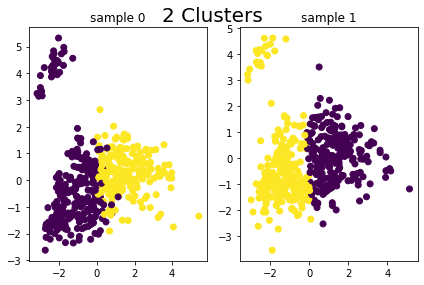

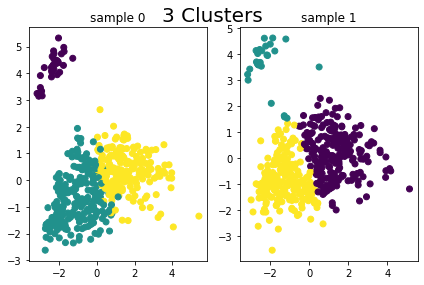

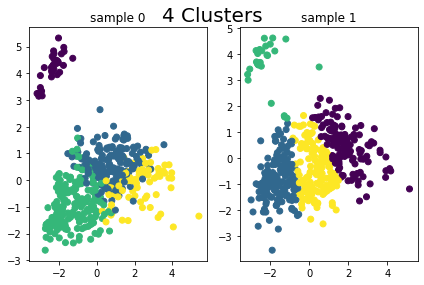

In [42]:
# For each  number of clusters, plot the clusters using the
# pca features for each sample.
for cluster in range(2, 5):
    
    # Make a grid of subplots.
    f, axarr = plt.subplots(1, 2)
    
    # Make a plot for each sample.
    for i in range(2):
        
        # PCA-created features.
        x_sub = ytahmin['pca_f1_sample{}'.format(i)]
        y_sub = ytahmin['pca_f2_sample{}'.format(i)]
        
        # Cluster assignments.
        c = ytahmin['clust{}_sample{}'.format(cluster, i)]
        
        # Assign the subplot to its place on the grid.
        axarr[i].scatter(x_sub, y_sub, c=c)
        axarr[i].set_title('sample {}'.format(i))
    
    # Space out the plots so that the headings don't overlap axis values.
    plt.suptitle('{} Clusters'.format(cluster), fontsize=20)
    plt.tight_layout()
    plt.show()
    print('\n')

- K-ortalama, tutarlilik grafikleri incelendiginde 2 ve 3 kumeli durumlarda tutarli sonuc verirken 4 kumeli cozum tutarsizdir. 4 kumeli cozumde orneklemin yarisinda grafigin alt bolumundeki uc kume orneklemin diger yarisina gore farkli sekilde kumelenmistir.

---
#### ***Gerçek etiketlere sahip olduğumuzda: ARI***

- K veri setini tüm veri kümelerine k, iki, üç ve dört eşit olacak şekilde uygulayın ve her biri için ARI puanı alın. Hangi model en iyisidir?

- Bir "temel gerçeğe" sahipsek - kümelerimizi kontrol etmek için kullanabileceğimiz bazı veri noktası grubu üyelikleri varsa - o zaman zaten bildiğimiz grup üyeliğini en çok kopyalayan küme çözümünü seçebiliriz.

- ARI ile, 0'dan küçük değerler elde etmek mümkündür, ancak 1 mükemmel uyumu, 0 ise mükemmel rastgeleliği gösterir.

In [43]:
# Tahmin edilen kümelemenin elde edilmesi.
n_clusters = [2,3,4]
print('ARI Scores for:') 
for n in n_clusters:
    tam_tahmin = KMeans(n_clusters=n, random_state=222).fit_predict(X_std)
    print('\t{} clusters :{:.6f}'.format(n, metrics.adjusted_rand_score(y, tam_tahmin)))

ARI Scores for:
	2 clusters :0.238333
	3 clusters :0.262747
	4 clusters :0.232851


- ARI skorlarina gore en iyi kumeleme yapan model 3 kumeli modeldir. Ancak yine de skorlar cok da yuksek degildir.

---
#### ***Gerçek etiketlere sahip değilsek: Benzerlik (siluet)***

- K veri setini tüm veri kümelerine k, iki, üç ve dört eşit olacak şekilde uygulayın ve her biri için siluet katsayısı elde edin. Hangi model en iyisidir?

- İyi bir küme, diğer kümelerdeki veri noktalarına kıyasla birbirine benzer veri noktalarından oluşur. Benzerliği hesaplamanın bir yolu siluet (silhouette) katsayısıdır.

- Değerler çok kötü kümelenmeler için -1 ile çok yoğun kümelenmeler için +1 arasındadır.

In [44]:
# Tahmin edilen kümelemenin elde edilmesi.
n_clusters = [2,3,4]
print('Silhouette Scores for:') 
for n in n_clusters:
    etiketler = KMeans(n_clusters=n, random_state=222).fit_predict(X_std)
    print('\t{} clusters :{:.6f}'.format(n, metrics.silhouette_score(X_std, etiketler,
                                                                     metric='euclidean')))

Silhouette Scores for:
	2 clusters :0.153747
	3 clusters :0.183204
	4 clusters :0.185796


- Siluet katsayisina gore 3 ve 4 kumeli modeller 2 kumeli modele nazaran daha basarilidir. Ancak yine de skorlar cok da yuksek degildir.